# Data Mining CMP-7023B
## Coursework 2: Data Mining the Healthcare Dataset

### Content
Features:
- 'id': Unique patient ID.
- 'age': Age of the patient.
- 'gender': Gender of the patient.
- 'sick': Is the patient currently sick?
- 'pregnant': Is the patient currently pregnant?
- 'test_X1' to 'test_X6': Related to various medical tests.
- 'concern_type1' and 'concern_type2': Related to concerns.
- 'enlargement': Indicating enlargement.
- 'tumor': Does the patient have a tumor?
- 'disorder': Indicating a certain gland disorder.
- 'medication_A': Is the patient on medication A?
- 'medication_B': Is the patient on medication B?
- 'mental_health': Is the patient undergoing psychiatric evaluation?
- 'mood_stabiliser': Related to mood stabilization medication.
- 'surgery': Has the patient undergone surgery?
- 'treatment_type1': Is the patient undergoing treatment A?
- 'suspect': Does the patient suspect disease?
- 'target': Medical diagnosis (target variable/label).

### Task 1: Data Exploration
<strong>Coding</strong><br>
<input type="checkbox" checked>
<label>Download the dataset</label><br>
<input type="checkbox" checked>
<label>Prepare a summary of features, including data type (numerical/categorical)</label><br>
<input type="checkbox" checked>
<label>Assess the amount of missing data and outliers in individual features</label><br>
<input type="checkbox" checked>
<label>Conduct initial exploration with visualisation and statistical analysis of the features.</label><br>

<strong>Report</strong><br>
<input type="checkbox">
<label>Introduce the dataset in your report including any interesting visualisations.</label><br> 

#### Task 1.1: loading data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, Normalizer, PowerTransformer, QuantileTransformer, StandardScaler, label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
print("IMPORT COMPLETED!")

IMPORT COMPLETED!


Read csv file using pandas excluding `id` columns from the data frame

In [2]:
disease_data_path = "/Users/mac/Desktop/Study/Data_Mining/CW2/disease_train.csv"

disease_data = pd.read_csv(disease_data_path)
disease_data = disease_data.iloc[:, 1:]

disease_data.head()

,age,gender,sick,pregnant,test_X1,test_X2,test_X3,test_X4,test_X5,test_X6,...,tumor,disorder,medication_A,medication_B,mental_health,mood_stabiliser,surgery,treatment_type1,suspect,target
0,59,male,no,no,7.8,NaN,89.0,0.85,105.0,NaN,...,no,no,no,no,no,no,no,no,no,moderate_risk
1,48,female,no,no,1.5,2.5,101.0,0.97,104.0,NaN,...,no,no,yes,no,no,yes,no,no,no,low_risk
2,77,male,no,no,7.3,1.2,57.0,1.28,44.0,NaN,...,no,no,no,no,no,no,no,no,no,moderate_risk
3,42,female,no,no,1.2,2.5,106.0,0.98,108.0,27.0,...,no,no,no,no,no,no,no,no,no,low_risk
4,38,female,no,no,0.6,1.9,95.0,NaN,NaN,NaN,...,no,no,no,no,no,no,no,no,no,low_risk


#### Task 1.2: Explore data types and prepare summary of features
Check data types and missing values and separate features into numerical and categorical columns excluding `target` column.

In [3]:
print("Data types and missing values:")
print(f"{disease_data.info()}\n")

categorical=[]
numerical=[]
for col in disease_data.columns:
    if col != 'target':
        if disease_data[col].dtypes != 'object':
                numerical.append(col)
        else:
            categorical.append(col)

print(f'{len(categorical)} Categorical Columns:\n{categorical}\n')
print(f'{len(numerical)} Numerical Columns:\n{numerical}')

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              4250 non-null   int64  
 1   gender           4109 non-null   object 
 2   sick             4250 non-null   object 
 3   pregnant         4250 non-null   object 
 4   test_X1          3839 non-null   float64
 5   test_X2          3007 non-null   float64
 6   test_X3          4034 non-null   float64
 7   test_X4          3858 non-null   float64
 8   test_X5          3863 non-null   float64
 9   test_X6          154 non-null    float64
 10  concern_type1    4250 non-null   object 
 11  concern_type2    4250 non-null   object 
 12  enlargement      4250 non-null   object 
 13  tumor            4250 non-null   object 
 14  disorder         4250 non-null   object 
 15  medication_A     4250 non-null   object 
 16  medication_B     4250 non-nul

#### Task 1.3: Visualization of features
Visualize the distribution of the `target` variable

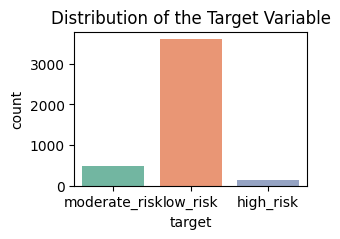

In [4]:
plt.figure(figsize=(3, 2))
sns.countplot(x="target", data=disease_data, palette="Set2")
plt.title("Distribution of the Target Variable")
# plt.savefig('countplot_target.png')
plt.show()

Visualize the distribution of each categorical variable by the `target` variable.

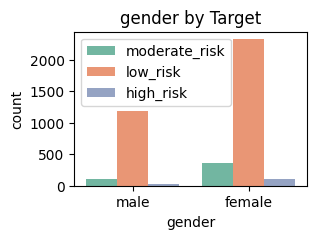

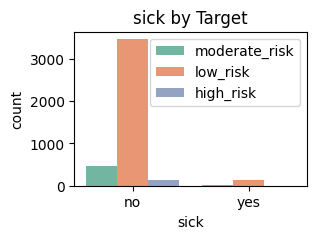

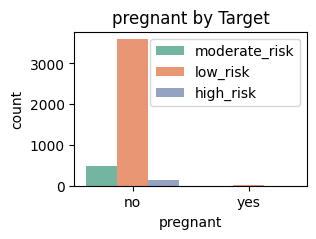

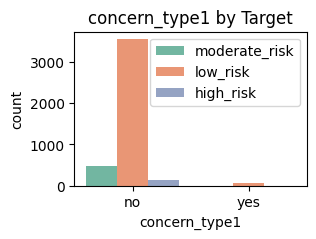

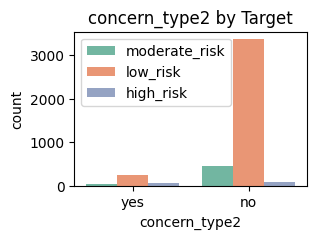

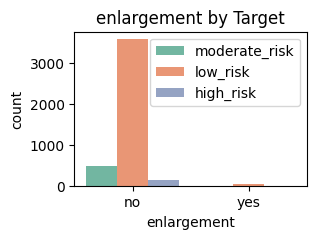

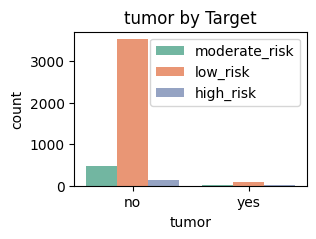

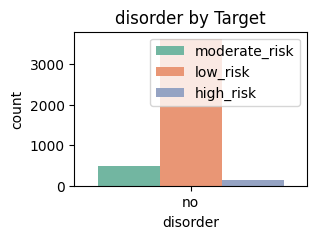

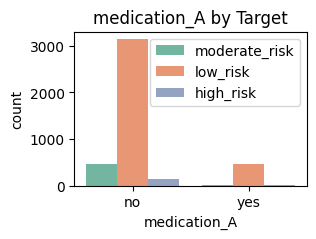

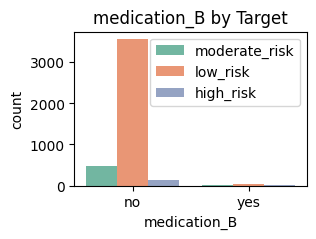

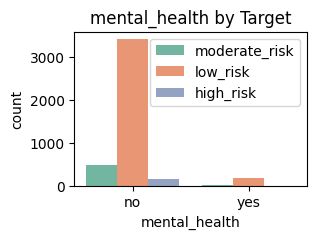

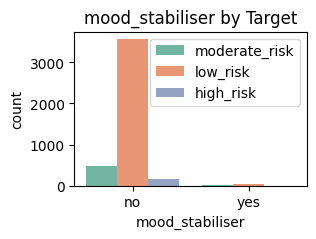

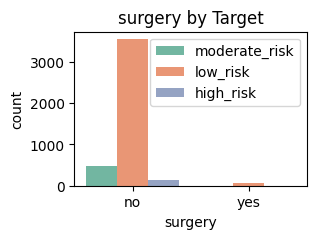

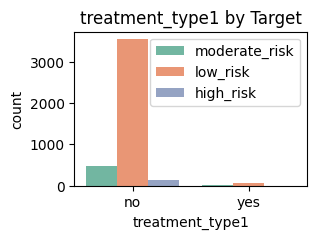

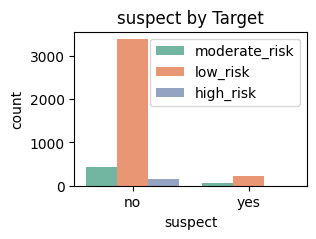

In [5]:
target = disease_data['target']

for col in categorical:
    if col != 'target' and col != 'id':
        plt.figure(figsize=(3,2))
        sns.countplot(x=disease_data[col], hue=target, palette="Set2")
        plt.title(f"{col} by Target")
        plt.legend()
#         plt.savefig(f"countplot_{col}.png")
        plt.show()

### Task 2: Data Cleansing and Pre-processing
<strong>Coding</strong><br>
<input type="checkbox" checked>
<label>Undertake any neccessary cleansing or pre-processing</label><br>

<strong>Report</strong><br>
<input type="checkbox">
<label>Explain what you have done and why you have done it</label><br>
<small>- remove any feature/column if 60% values are missing, constant</small><br>
<small>- remove duplicate and highly correlated information</small>

#### Task 2.1: Convert data to integer
Change all data types except target variable from `str` to `int64` in order to use all features to analyse and train data.

In [6]:
disease_data['gender'].replace({'male': 0, 'female': 1}, inplace=True)

columns_to_replace = ['sick', 'pregnant', 'concern_type1', 'concern_type2',
                      'enlargement', 'tumor', 'disorder', 'medication_A', 'medication_B',
                      'mental_health', 'mood_stabiliser', 'surgery', 'treatment_type1', 'suspect']

replacement_map = {'no': 0, 'yes': 1}

for col in columns_to_replace:
    disease_data[col].replace(replacement_map, inplace=True)
    
disease_data

,age,gender,sick,pregnant,test_X1,test_X2,test_X3,test_X4,test_X5,test_X6,...,tumor,disorder,medication_A,medication_B,mental_health,mood_stabiliser,surgery,treatment_type1,suspect,target
0,59,0.0,0,0,7.8,NaN,89.0,0.85,105.0,NaN,...,0,0,0,0,0,0,0,0,0,moderate_risk
1,48,1.0,0,0,1.5,2.5,101.0,0.97,104.0,NaN,...,0,0,1,0,0,1,0,0,0,low_risk
2,77,0.0,0,0,7.3,1.2,57.0,1.28,44.0,NaN,...,0,0,0,0,0,0,0,0,0,moderate_risk
3,42,1.0,0,0,1.2,2.5,106.0,0.98,108.0,27.0,...,0,0,0,0,0,0,0,0,0,low_risk
4,38,1.0,0,0,0.6,1.9,95.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,low_risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,29,0.0,0,0,0.5,2.3,105.0,0.86,122.0,NaN,...,0,0,0,0,0,0,0,0,0,low_risk
4246,46,1.0,0,0,35.0,1.2,16.0,0.86,19.0,NaN,...,0,0,0,0,0,0,0,0,0,moderate_risk
4247,72,1.0,0,0,3.4,2.1,88.0,0.96,92.0,NaN,...,0,0,0,0,0,0,0,0,0,low_risk
4248,94,1.0,0,0,3.9,NaN,157.0,1.02,154.0,NaN,...,0,0,0,0,0,0,0,0,0,low_risk


#### Task 2.2: Check for missing values

In [7]:
print(f"Duplicated Data: {disease_data.duplicated().sum()}")

missing_values = disease_data.isnull().sum()
missing_sum = missing_values.sum()
total = np.product(disease_data.shape)
percent_missing = (missing_sum/total)*100

print(f'Missing Data: {percent_missing.round(2)}%')
print("Missing values per feature:")
print(missing_values)

Duplicated Data: 4
Missing Data: 7.04%
Missing values per feature:
age                   0
gender              141
sick                  0
pregnant              0
test_X1             411
test_X2            1243
test_X3             216
test_X4             392
test_X5             387
test_X6            4096
concern_type1         0
concern_type2         0
enlargement           0
tumor                 0
disorder              0
medication_A          0
medication_B          0
mental_health         0
mood_stabiliser       0
surgery               0
treatment_type1       0
suspect               0
target                0
dtype: int64


Using `heatmap` on the features to see if any column giving almost the same data or not.

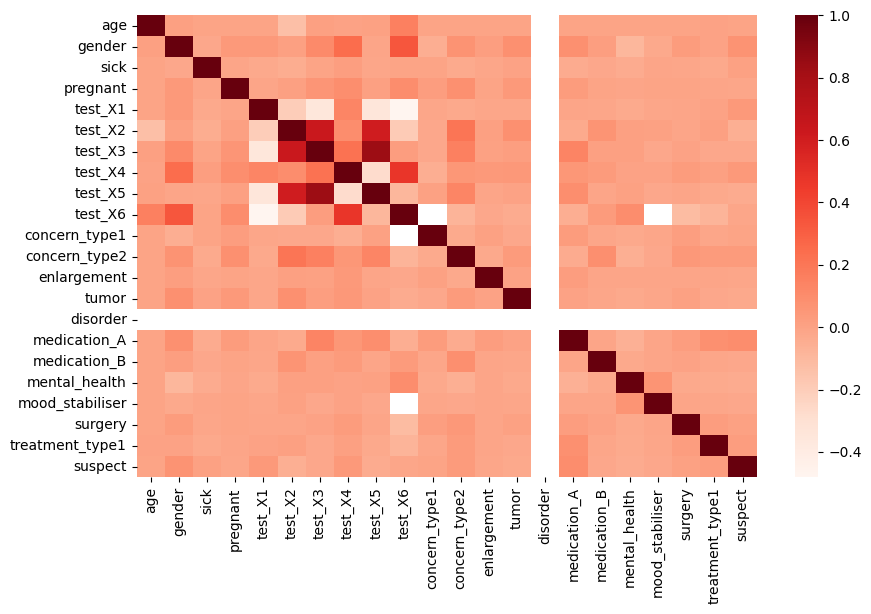

In [8]:
corr = disease_data.iloc[:, :-1].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=False, cmap=plt.cm.Reds)
# plt.savefig('heatmap.png')
plt.show()

In [9]:
numerical_df = disease_data.iloc[:, :-1]

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.7:
            if columns[j]:
                columns[j] = False
selected_columns = numerical_df.columns[columns]
data = numerical_df[selected_columns]

unrelated_col = numerical_df.loc[:, ~numerical_df.columns.isin(selected_columns)].columns
print(f"column(s) to be dropped:\n{unrelated_col}")

column(s) to be dropped:
Index(['test_X5'], dtype='object')


Explore data descriptions to see the distributions of individual attributes.

In [10]:
disease_data.describe()

,age,gender,sick,pregnant,test_X1,test_X2,test_X3,test_X4,test_X5,test_X6,...,enlargement,tumor,disorder,medication_A,medication_B,mental_health,mood_stabiliser,surgery,treatment_type1,suspect
count,4250.000000,4109.000000,4250.000000,4250.000000,3839.000000,3007.000000,4034.000000,3858.000000,3863.000000,154.000000,...,4250.000000,4250.000000,4250.0,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,67.374824,0.678267,0.036471,0.003529,7.342463,2.035580,104.919623,0.970846,110.090834,23.325974,...,0.008235,0.026118,0.0,0.115294,0.012706,0.045647,0.010588,0.014588,0.019059,0.070353
std,1004.518821,0.467198,0.187480,0.059311,32.657963,0.920404,35.496255,0.162474,39.837621,5.317032,...,0.090385,0.159504,0.0,0.319414,0.112015,0.208743,0.102365,0.119912,0.136748,0.255771
min,1.000000,0.000000,0.000000,0.000000,0.005000,0.050000,2.000000,0.250000,1.400000,8.400000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,0.000000,0.000000,0.000000,0.600000,1.600000,87.000000,0.870000,92.000000,20.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,0.000000,0.000000,1.500000,1.900000,102.000000,0.960000,107.000000,24.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,67.000000,1.000000,0.000000,0.000000,3.000000,2.300000,121.000000,1.060000,125.000000,27.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,65526.000000,1.000000,1.000000,1.000000,530.000000,18.000000,430.000000,1.960000,642.000000,45.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Task 2.3: Remove unneccessary features and manage missing values
Drop test_X5 and test_X6 columns

In [11]:
disease_data = disease_data.drop(['test_X5', 'test_X6', 'disorder'], axis=1)

print(f"Duplicated Data: {disease_data.duplicated().sum()}")
print("Shape of Dataframe:", disease_data.shape)

Duplicated Data: 40
Shape of Dataframe: (4250, 20)


Examine the mean for each attribute.

In [12]:
disease_data.iloc[:, :-1].agg({ 
    col:['mean'] 
    for col in disease_data.iloc[:, :-1].columns
})

,age,gender,sick,pregnant,test_X1,test_X2,test_X3,test_X4,concern_type1,concern_type2,enlargement,tumor,medication_A,medication_B,mental_health,mood_stabiliser,surgery,treatment_type1,suspect
mean,67.374824,0.678267,0.036471,0.003529,7.342463,2.03558,104.919623,0.970846,0.015765,0.081176,0.008235,0.026118,0.115294,0.012706,0.045647,0.010588,0.014588,0.019059,0.070353


Since we convert all data into numeric, we replace missing values using the mean along each column using `mean` values. Then, missing values are rechecked.

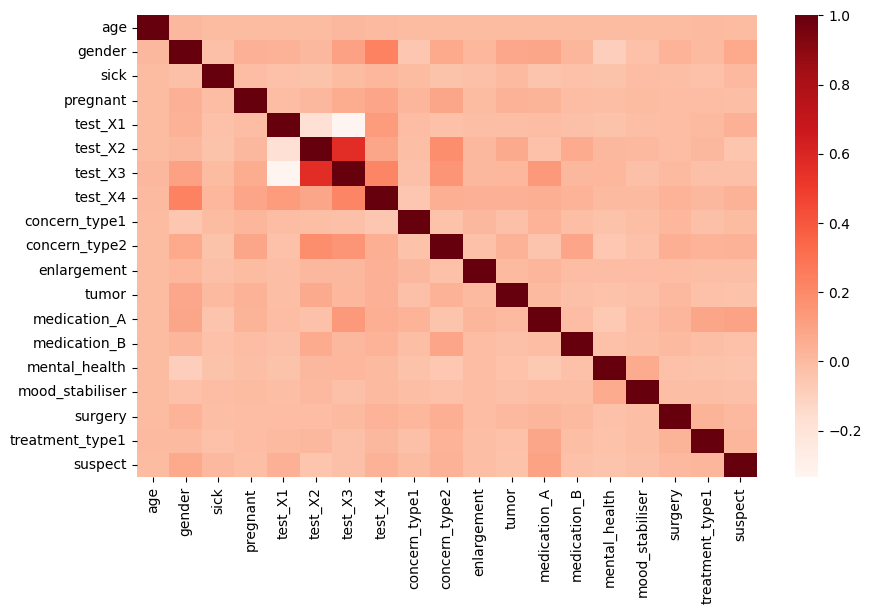

Duplicated Data: 0
Missing Data: 0.0%
Missing values after filling:
age                0
gender             0
sick               0
pregnant           0
test_X1            0
test_X2            0
test_X3            0
test_X4            0
concern_type1      0
concern_type2      0
enlargement        0
tumor              0
medication_A       0
medication_B       0
mental_health      0
mood_stabiliser    0
surgery            0
treatment_type1    0
suspect            0
target             0
dtype: int64


In [13]:
disease_data = disease_data.drop_duplicates(keep='first')
disease_data.iloc[:, 0:-1] = disease_data.iloc[:, 0:-1].fillna(disease_data.iloc[:, 0:-1].mean())

missing_values = disease_data.isnull().sum()
missing_sum = missing_values.sum()
total = np.product(disease_data.shape)
percent_missing = (missing_sum/total)*100

corr = disease_data.iloc[:, :-1].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=False, cmap=plt.cm.Reds)
# plt.savefig('heatmap_after.png')
plt.show()

print(f"Duplicated Data: {disease_data.duplicated().sum()}")
print(f'Missing Data: {percent_missing.round(2)}%')
print("Missing values after filling:")
print(disease_data.isnull().sum())

#### Task 2.4: Detect outliers and clean them
Check for outliers using `boxplots`, `scatterplot` and `histograms`.

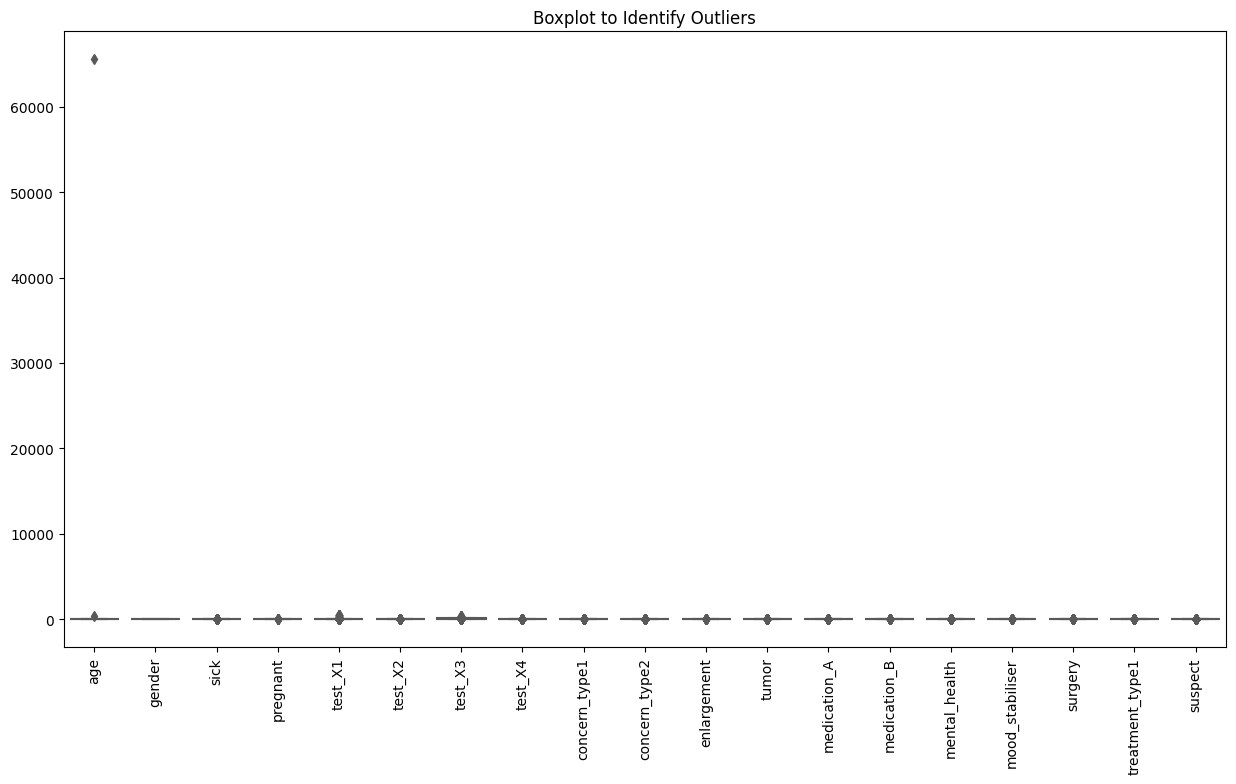

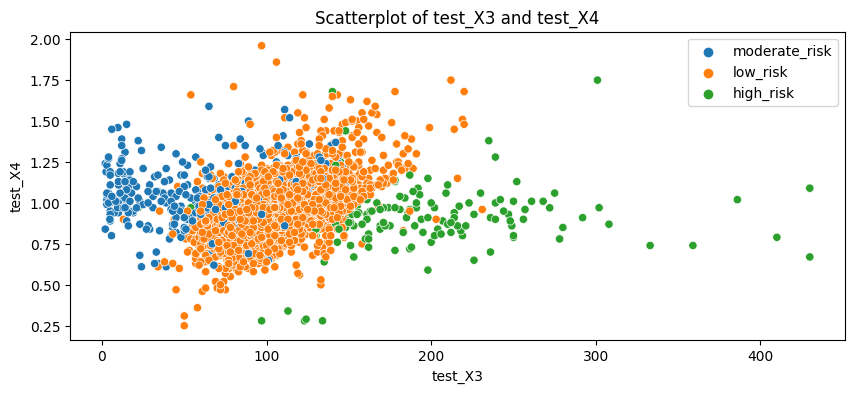

<Figure size 1000x400 with 0 Axes>

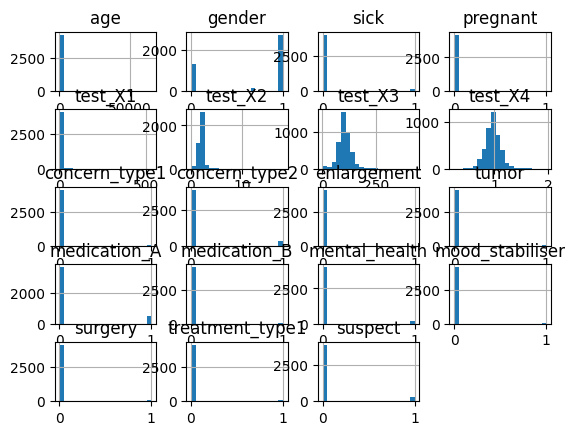

In [14]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=disease_data, palette="Set2")
plt.title("Boxplot to Identify Outliers")
plt.xticks(rotation=90) 
# plt.savefig('boxplot_before.png')
plt.show()

plt.figure(figsize=(10,4))
sns.scatterplot(x=disease_data['test_X3'], y=disease_data['test_X4'],hue=disease_data['target'])
plt.title("Scatterplot of test_X3 and test_X4")
plt.legend()
# plt.savefig('scatterplot_before.png')
plt.show()

plt.figure(figsize=(10,4))
disease_data.hist(bins=20)
plt.title("Histograms of Numerical Features")
# plt.savefig('histogram_before.png')
plt.show()

In [15]:
X_lof = disease_data.iloc[:, :-1]
y_lof = disease_data["target"] 

le = LabelEncoder()
y_lof = le.fit_transform(y_lof)

print(f"X shape: {X_lof.shape}")
print(f"y shape: {y_lof.shape}")
print(f"encoded label: {y_lof}")

X_train_lof, X_test_lof, y_train_lof, y_test_lof = train_test_split(X_lof, y_lof, test_size=0.2, random_state=3, stratify=y_lof)

# Define parameter grid
param_grid = {
    'n_neighbors': [1, 5, 10, 15, 20], 
    'contamination': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25]
}

lof = LocalOutlierFactor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lof, param_grid=param_grid, scoring='average_precision')

# Perform grid search
grid_search.fit(X_train_lof)

# Get best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

X shape: (4210, 19)
y shape: (4210,)
encoded label: [2 1 2 ... 1 1 1]
Best parameters: {'contamination': 0.01, 'n_neighbors': 1}


Detect and remove outlier using `Local Outlier Factor` or `LOF` algorithm. Explore the data using boxplot again after removed outliers

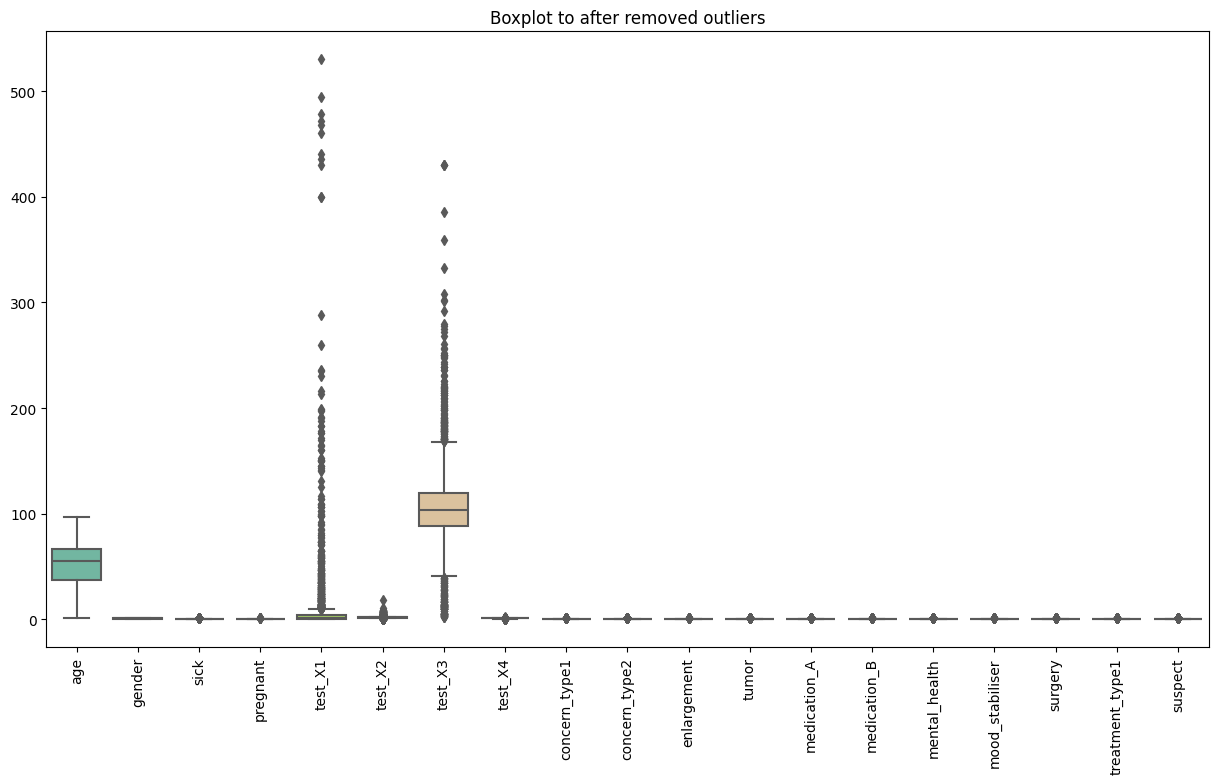

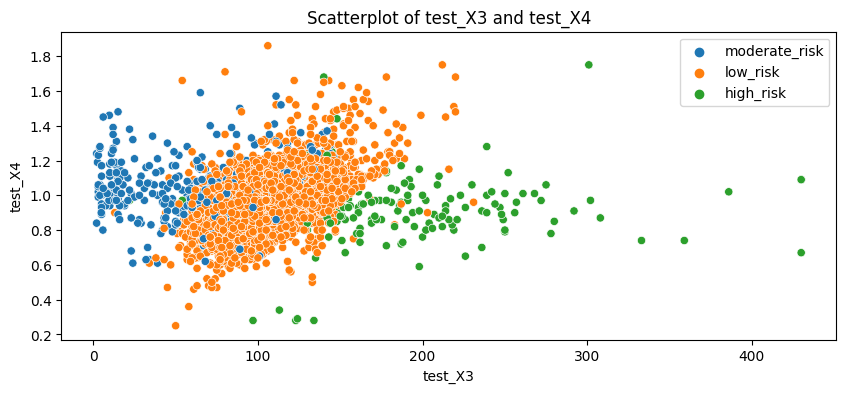

<Figure size 1000x400 with 0 Axes>

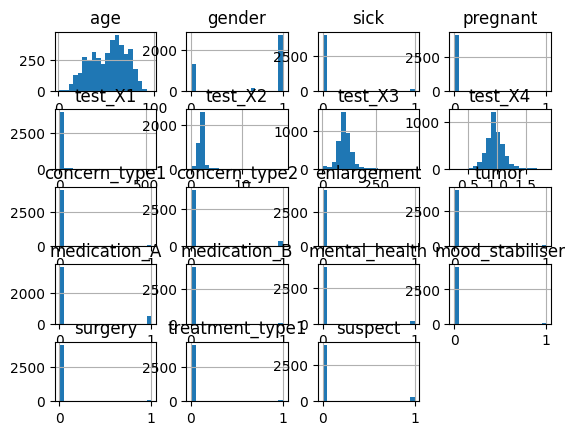

In [16]:
lof = LocalOutlierFactor(n_neighbors=1, contamination=0.01)

outlier_labels = lof.fit_predict(disease_data.iloc[:, 0:-1])

disease_data_cleaned = disease_data[outlier_labels != -1]

plt.figure(figsize=(15, 8))
sns.boxplot(data=disease_data_cleaned, palette="Set2")
plt.title("Boxplot to after removed outliers")
plt.xticks(rotation=90) 
# plt.savefig('boxplot_after.png')
plt.show()

plt.figure(figsize=(10,4))
sns.scatterplot(x=disease_data_cleaned['test_X3'], y=disease_data_cleaned['test_X4'],hue=disease_data_cleaned['target'])
plt.title("Scatterplot of test_X3 and test_X4")
plt.legend()
# plt.savefig('scatterplot_after.png')
plt.show()

plt.figure(figsize=(10,4))
disease_data_cleaned.hist(bins=20)
plt.title("Histograms of Numerical Features")
# plt.savefig('histogram_after.png')
plt.show()

### Task 3: Supervised Model Training, Tuning, and Evaluation
#### Task 3.1: Split data into a training & validation set
Define X and y for data training. X contains all column except the target column (the last column) and y contain our target variable. Finally target labels are transformed from string to integer by `LabelEncode`.

In [17]:
X = disease_data_cleaned.iloc[:, :-1]
y = disease_data_cleaned["target"] 

le = LabelEncoder()
y = le.fit_transform(y)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"encoded label: {y}")

X shape: (4167, 19)
y shape: (4167,)
encoded label: [2 1 2 ... 1 1 1]


Split data into separate training and test set by `train_test_split` using all features and target with 20% test size. Use `smote` to balance the target labels.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

class_counts = np.unique(y_train, return_counts=True)

print("Class Counts Before Balancing:")
print(class_counts)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Count the occurrences of each class after balancing
balanced_class_counts = np.unique(y_train_balanced, return_counts=True)

# Display the class counts after balancing
print("\nClass Counts After Balancing:")
print(balanced_class_counts)

Class Counts Before Balancing:
(array([0, 1, 2]), array([ 117, 2832,  384]))

Class Counts After Balancing:
(array([0, 1, 2]), array([2832, 2832, 2832]))


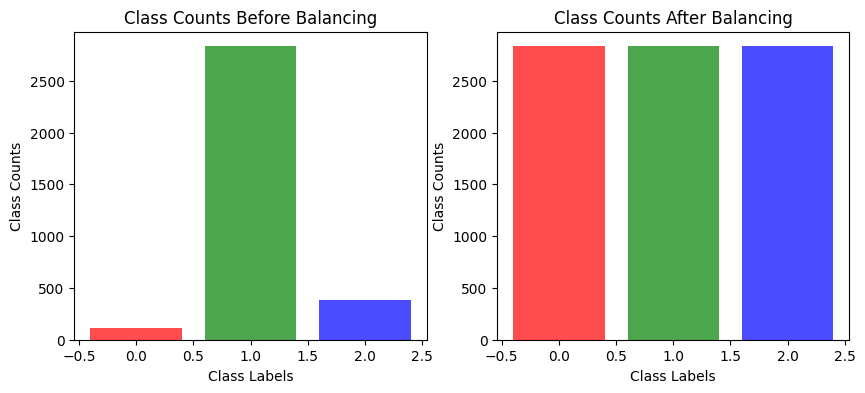

In [19]:
class_labels_before, counts_before = class_counts[0], class_counts[1]
class_labels_after, counts_after = balanced_class_counts[0], balanced_class_counts[1]

# Specify colors for each class
colors_before = ['red', 'green', 'blue']  # Replace with your desired colors
colors_after = ['red', 'green', 'blue']  # Replace with your desired colors

# Plotting class counts before and after balancing
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.bar(class_labels_before, counts_before, color=colors_before, alpha=0.7)
ax1.set_title('Class Counts Before Balancing')
ax1.set_xlabel('Class Labels')
ax1.set_ylabel('Class Counts')

ax2.bar(class_labels_after, counts_after, color=colors_after, alpha=0.7)
ax2.set_title('Class Counts After Balancing')
ax2.set_xlabel('Class Labels')
ax2.set_ylabel('Class Counts')

# plt.savefig('balance.png')
plt.show()

#### Task 3.2: Train  models using toolkits

#### Classifier 1: k-NN
Cross-validation to find the best value of `number of neighbors` (value of k)

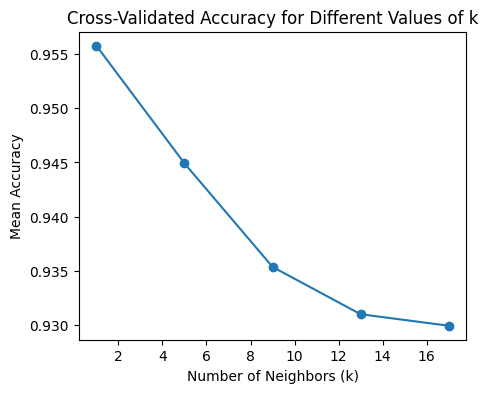

The best value of k is: 1


In [20]:
# Create a range of odd k values to try
k_values = np.arange(1, 21, 4)

# List to store mean accuracy for each k
mean_accuracies = []

# Iterate over each k value
for k in k_values:
    # Create a k-NN classifier with the current k value
    knn_classifier_cv = KNeighborsClassifier(n_neighbors=k)
    
    # Perform 5-fold cross-validation and get mean accuracy
    accuracies = cross_val_score(knn_classifier_cv, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
    mean_accuracy = np.mean(accuracies)
    
    # Append mean accuracy to the list
    mean_accuracies.append(mean_accuracy)

# Plot the mean accuracy for each k
plt.figure(figsize=(5, 4))
plt.plot(k_values, mean_accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Accuracy')
plt.title('Cross-Validated Accuracy for Different Values of k')
# plt.savefig('k_values.png')
plt.show()

# Find the best k value
best_k = k_values[np.argmax(mean_accuracies)]
print(f'The best value of k is: {best_k}')

Apply the best k value with `k-NN` Classifier and print training performance

In [21]:
knn_classifier = KNeighborsClassifier(n_neighbors=1)

# Create a pipeline for knn
pipeline_knn_classifier = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', knn_classifier)
])

# Train the classifier on the training data
pipeline_knn_classifier.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test data
y_pred = pipeline_knn_classifier.predict(X_test)

# Evaluate accuracy, precision and recall
accuracy_knn = accuracy_score(y_test, y_pred)*100
precision_knn = precision_score(y_test, y_pred, average='weighted')*100
recall_knn = recall_score(y_test, y_pred, average='weighted')*100

# Print the results
print("Classifier 1: k_NN\n")
print("---Training Performance (%)---")
print(f'Accuracy: {accuracy_knn:.2f}')
print(f'Precision: {precision_knn:.2f}')
print(f'Recall: {recall_knn:.2f}')

# Generate the classification report
report = classification_report(y_test, y_pred)
print("\n---Classification Report---\n", report)

# Check for overfitting and underfitting
print("---Scores on training and test set (%)---")
print('Training set score: {:.2f}'.format(pipeline_knn_classifier.score(X_train_balanced, y_train_balanced)*100))
print('Test set score: {:.2f}'.format(pipeline_knn_classifier.score(X_test, y_test)*100))

Classifier 1: k_NN

---Training Performance (%)---
Accuracy: 85.61
Precision: 86.41
Recall: 85.61

---Classification Report---
               precision    recall  f1-score   support

           0       0.72      0.79      0.75        29
           1       0.92      0.90      0.91       709
           2       0.46      0.52      0.49        96

    accuracy                           0.86       834
   macro avg       0.70      0.74      0.72       834
weighted avg       0.86      0.86      0.86       834

---Scores on training and test set (%)---
Training set score: 100.00
Test set score: 85.61


#### Classifier 2: Decision Tree

Using `Decision Tree` Classifier and print training performance

In [22]:
decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=3)

decision_tree.fit(X_train_balanced, y_train_balanced)

y_pred_dt = decision_tree.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)*100
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')*100
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')*100
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')*100

print("Classifier 2: Decision Tree\n")
print("---Training Performance (%)---")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")

# Generate the classification report
report = classification_report(y_test, y_pred_dt)
print("\n---Classification Report---\n", report)

# Check for overfitting and underfitting
print("---Scores on training and test set (%)---")
print('Training set score: {:.4f}'.format(decision_tree.score(X_train_balanced, y_train_balanced)*100))
print('Test set score: {:.4f}'.format(decision_tree.score(X_test, y_test)*100))

Classifier 2: Decision Tree

---Training Performance (%)---
Accuracy: 96.5228
Precision: 97.6915
Recall: 96.5228
F1 Score: 96.8949

---Classification Report---
               precision    recall  f1-score   support

           0       0.54      0.93      0.68        29
           1       1.00      0.96      0.98       709
           2       0.96      1.00      0.98        96

    accuracy                           0.97       834
   macro avg       0.83      0.96      0.88       834
weighted avg       0.98      0.97      0.97       834

---Scores on training and test set (%)---
Training set score: 97.5518
Test set score: 96.5228


Perform parameter tuning for `Decision Tree`.

In [23]:
# Define hyperparameter grids for grid search
param_grid_dt = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create a pipeline with scaling/transformation and classification stages
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', decision_tree)
])

# Perform Grid Search to find the optimal hyperparameters for Decision Tree
grid_search_dt = GridSearchCV(estimator=pipeline_dt, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train_balanced, y_train_balanced)

# Get the best hyperparameters for Decision Tree
best_params_dt = grid_search_dt.best_params_
print("Best Hyperparameters (Decision Tree):", best_params_dt)

# Retrain the Decision Tree model with the tuned hyperparameters
tuned_pipeline_dt = grid_search_dt.best_estimator_
tuned_pipeline_dt.fit(X_train_balanced, y_train_balanced)

# Evaluate the tuned Decision Tree model on the testing set
y_pred_tuned_dt = tuned_pipeline_dt.predict(X_test)

# Evaluate the model's performance for Decision Tree
accuracy_tuned_dt = accuracy_score(y_test, y_pred_tuned_dt)*100

# Display the evaluation metrics for the tuned model
print("\n---Performance of the Tuned Decision Tree Model (%)---")
print(f"Accuracy: {accuracy_tuned_dt:.4f}")

# Generate the classification report
report_tuned_dt = classification_report(y_test, y_pred_tuned_dt)

print("\n---Classification Report of the Tuned Decision Tree Model---")
print(report_tuned_dt)

# Make predictions on both training and testing sets
y_pred_train_dt = tuned_pipeline_dt.predict(X_train_balanced)
y_pred_test_dt = tuned_pipeline_dt.predict(X_test)

# Evaluate the model's performance on both sets
accuracy_train_dt = accuracy_score(y_train_balanced, y_pred_train_dt)*100
accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)*100

# Additional metrics
precision_train_dt = precision_score(y_train_balanced, y_pred_train_dt, average='weighted')*100
recall_train_dt = recall_score(y_train_balanced, y_pred_train_dt, average='weighted')*100
f1_train_dt = f1_score(y_train_balanced, y_pred_train_dt, average='weighted')*100

precision_test_dt = precision_score(y_test, y_pred_test_dt, average='weighted')*100
recall_test_dt = recall_score(y_test, y_pred_test_dt, average='weighted')*100
f1_test_dt = f1_score(y_test, y_pred_test_dt, average='weighted')*100

# Check for overfitting and underfitting
print("---Metrics on Training Set (%)---")
print(f"Accuracy: {accuracy_train_dt:.4f}, Precision: {precision_train_dt:.4f}, Recall: {recall_train_dt:.4f}, F1-Score: {f1_train_dt:.4f}")
print("\n---Metrics on Testing Set (%)---")
print(f"Accuracy: {accuracy_test_dt:.4f}, Precision: {precision_test_dt:.4f}, Recall: {recall_test_dt:.4f}, F1-Score: {f1_test_dt:.4f}")

Best Hyperparameters (Decision Tree): {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}

---Performance of the Tuned Decision Tree Model (%)---
Accuracy: 97.1223

---Classification Report of the Tuned Decision Tree Model---
              precision    recall  f1-score   support

           0       0.68      0.86      0.76        29
           1       0.98      0.98      0.98       709
           2       0.99      0.93      0.96        96

    accuracy                           0.97       834
   macro avg       0.88      0.92      0.90       834
weighted avg       0.97      0.97      0.97       834

---Metrics on Training Set (%)---
Accuracy: 100.0000, Precision: 100.0000, Recall: 100.0000, F1-Score: 100.0000

---Metrics on Testing Set (%)---
Accuracy: 97.1223, Precision: 97.4217, Recall: 97.1223, F1-Score: 97.2211


#### Classifier 3: SVC

Using `SVC` Classifier and print training performance

In [24]:
svc = SVC()

# Train the classifier on the training data
svc.fit(X_train_balanced, y_train_balanced);

y_pred = svc.predict(X_test)

accuracy_svc = accuracy_score(y_test, y_pred)*100
precision_svc = precision_score(y_test, y_pred, average='weighted')*100
recall_svc = recall_score(y_test, y_pred, average='weighted')*100
f1_svc = f1_score(y_test, y_pred, average='weighted')*100

print("Classifier 3: SVC\n")
print("---Training Performance (%)---")
print(f"Accuracy: {accuracy_svc:.2f}")
print(f"Precision: {precision_svc:.2f}")
print(f"Recall: {recall_svc:.2f}")
print(f"F1 Score: {f1_svc:.2f}")

# Generate the classification report
report = classification_report(y_test, y_pred)
print("\n---Classification Report---\n", report)

# Check for overfitting and underfitting
print("---Scores on training and test set (%)---")
print('Training set score: {:.2f}'.format(svc.score(X_train_balanced, y_train_balanced)*100))
print('Test set score: {:.2f}'.format(svc.score(X_test, y_test)*100))

Classifier 3: SVC

---Training Performance (%)---
Accuracy: 83.93
Precision: 91.84
Recall: 83.93
F1 Score: 86.08

---Classification Report---
               precision    recall  f1-score   support

           0       0.32      0.90      0.47        29
           1       0.99      0.82      0.90       709
           2       0.56      0.97      0.71        96

    accuracy                           0.84       834
   macro avg       0.62      0.89      0.69       834
weighted avg       0.92      0.84      0.86       834

---Scores on training and test set (%)---
Training set score: 87.12
Test set score: 83.93


Perform parameter tuning for `SVC`.

In [25]:
# Define hyperparameter grids for grid search
param_grid_svc = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto']
}

# Create a pipeline with scaling/transformation and classification stages
pipeline_svc = Pipeline([
    ('scaler', StandardScaler()),  # Add any necessary scaling or transformations
    ('classifier', svc)
])

# Perform Grid Search to find the optimal hyperparameters for SVC
grid_search_svc = GridSearchCV(estimator=pipeline_svc, param_grid=param_grid_svc, cv=5, scoring='accuracy')
grid_search_svc.fit(X_train_balanced, y_train_balanced)

# Get the best hyperparameters for SVC
best_params_svc = grid_search_svc.best_params_
print("\nBest Hyperparameters (SVC):", best_params_svc)

# Retrain the SVC model with the tuned hyperparameters
tuned_pipeline_svc = grid_search_svc.best_estimator_
tuned_pipeline_svc.fit(X_train_balanced, y_train_balanced)

# Evaluate the tuned SVC model on the testing set
y_pred_tuned_svc = tuned_pipeline_svc.predict(X_test)

# Evaluate the model's performance for SVC
accuracy_tuned_svc = accuracy_score(y_test, y_pred_tuned_svc)*100

# Display the evaluation metrics for the tuned model
print("\n---Performance of the Tuned SVC Model (%)---")
print(f"Accuracy: {accuracy_tuned_svc:.2f}")

# Generate the classification report
report_tuned_svc = classification_report(y_test, y_pred_tuned_svc)

print("\n---Classification Report of the Tuned SVC Model---")
print(report_tuned_svc)

# Make predictions on both training and testing sets
y_pred_train_svc = tuned_pipeline_svc.predict(X_train_balanced)
y_pred_test_svc = tuned_pipeline_svc.predict(X_test)

# Evaluate the model's performance on both sets
accuracy_train_svc = accuracy_score(y_train_balanced, y_pred_train_svc)*100
accuracy_test_svc = accuracy_score(y_test, y_pred_test_svc)*100

# Additional metrics
precision_train_svc = precision_score(y_train_balanced, y_pred_train_svc, average='weighted')*100
recall_train_svc = recall_score(y_train_balanced, y_pred_train_svc, average='weighted')*100
f1_train_svc = f1_score(y_train_balanced, y_pred_train_svc, average='weighted')*100

precision_test_svc = precision_score(y_test, y_pred_test_svc, average='weighted')*100
recall_test_svc = recall_score(y_test, y_pred_test_svc, average='weighted')*100
f1_test_svc = f1_score(y_test, y_pred_test_svc, average='weighted')*100

# Check for overfitting and underfitting
print("---Metrics on Training Set (%)---")
print(f"Accuracy: {accuracy_train_svc:.2f}, Precision: {precision_train_svc:.2f}, Recall: {recall_train_svc:.2f}, F1-Score: {f1_train_svc:.2f}")
print("\n---Metrics on Testing Set (%)---")
print(f"Accuracy: {accuracy_test_svc:.2f}, Precision: {precision_test_svc:.2f}, Recall: {recall_test_svc:.2f}, F1-Score: {f1_test_svc:.2f}")


Best Hyperparameters (SVC): {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}

---Performance of the Tuned SVC Model (%)---
Accuracy: 89.81

---Classification Report of the Tuned SVC Model---
              precision    recall  f1-score   support

           0       0.59      0.79      0.68        29
           1       0.96      0.92      0.94       709
           2       0.65      0.76      0.70        96

    accuracy                           0.90       834
   macro avg       0.73      0.82      0.77       834
weighted avg       0.91      0.90      0.90       834

---Metrics on Training Set (%)---
Accuracy: 96.81, Precision: 96.84, Recall: 96.81, F1-Score: 96.80

---Metrics on Testing Set (%)---
Accuracy: 89.81, Precision: 90.88, Recall: 89.81, F1-Score: 90.21


In [26]:
# Evaluate the models on the testing set
y_pred_knn = pipeline_knn_classifier.predict(X_test)
y_pred_tuned_dt = tuned_pipeline_dt.predict(X_test)
y_pred_tuned_svc = tuned_pipeline_svc.predict(X_test)

# Calculate performance metrics for each model
metrics_knn = {
    'Accuracy': accuracy_score(y_test, y_pred_knn)*100,
    'Precision': precision_score(y_test, y_pred_knn, average='weighted')*100,
    'Recall': recall_score(y_test, y_pred_knn, average='weighted')*100,
    'F1 Score': f1_score(y_test, y_pred_knn, average='weighted')*100,
}

metrics_dt = {
    'Accuracy': accuracy_score(y_test, y_pred_tuned_dt)*100,
    'Precision': precision_score(y_test, y_pred_tuned_dt, average='weighted')*100,
    'Recall': recall_score(y_test, y_pred_tuned_dt, average='weighted')*100,
    'F1 Score': f1_score(y_test, y_pred_tuned_dt, average='weighted')*100,
}

metrics_svc = {
    'Accuracy': accuracy_score(y_test, y_pred_tuned_svc)*100,
    'Precision': precision_score(y_test, y_pred_tuned_svc, average='weighted')*100,
    'Recall': recall_score(y_test, y_pred_tuned_svc, average='weighted')*100,
    'F1 Score': f1_score(y_test, y_pred_tuned_svc, average='weighted')*100,
}

# Print performance metrics for each model
print("\nPerformance Metrics for k_NN:")
print(metrics_knn)

print("\nPerformance Metrics for Decision Tree:")
print(metrics_dt)

print("\nPerformance Metrics for SVC:")
print(metrics_svc)

# Select the best-performing model based on a chosen metric (e.g., accuracy)
best_model = max([(metrics_knn['Accuracy'], 'k_NN'),
                  (metrics_dt['Accuracy'], 'Decision Tree'),
                  (metrics_svc['Accuracy'], 'SVC')])


# You can also compare based on other metrics:
best_model_precision = max([(metrics_knn['Precision'], 'k_NN'),
                            (metrics_dt['Precision'], 'Decision Tree'),
                            (metrics_svc['Precision'], 'SVC')])

best_model_recall = max([(metrics_knn['Recall'], 'k_NN'),
                         (metrics_dt['Recall'], 'Decision Tree'),
                         (metrics_svc['Recall'], 'SVC')])

best_model_f1 = max([(metrics_knn['F1 Score'], 'k_NN'),
                     (metrics_dt['F1 Score'], 'Decision Tree'),
                     (metrics_svc['F1 Score'], 'SVC')])


print(f"\nThe best-performing model is: {best_model[1]} with {best_model[0]:.2f}% accuracy.")

print(f"\nThe best-performing model based on Precision is: {best_model_precision[1]} with {best_model_precision[0]:.2f}%")

print(f"\nThe best-performing model based on Recall is: {best_model_recall[1]} with {best_model_recall[0]:.2f}%")

print(f"\nThe best-performing model based on F1 Score is: {best_model_f1[1]} with {best_model_f1[0]:.2f}%")


Performance Metrics for k_NN:
{'Accuracy': 85.61151079136691, 'Precision': 86.41245444210183, 'Recall': 85.61151079136691, 'F1 Score': 85.9728278969306}

Performance Metrics for Decision Tree:
{'Accuracy': 97.12230215827337, 'Precision': 97.42167991972109, 'Recall': 97.12230215827337, 'F1 Score': 97.22106901188131}

Performance Metrics for SVC:
{'Accuracy': 89.80815347721823, 'Precision': 90.88395316258587, 'Recall': 89.80815347721823, 'F1 Score': 90.2104198961398}

The best-performing model is: Decision Tree with 97.12% accuracy.

The best-performing model based on Precision is: Decision Tree with 97.42%

The best-performing model based on Recall is: Decision Tree with 97.12%

The best-performing model based on F1 Score is: Decision Tree with 97.22%


#### Task 3.7: Produce the predicted label for best model
Read disease_test.csv and use Decision Tree Classifier to predict the label of each patient.

In [27]:
# Download and read data
test_data_path = "/Users/mac/Desktop/Study/Data_Mining/CW2/disease_test.csv"
test_data = pd.read_csv(test_data_path)

# start data pre-processing
test_data = test_data.drop(['test_X5', 'test_X6', 'disorder'], axis=1)

test_data['gender'].replace({'male': 0, 'female': 1}, inplace=True)

replacement_map = {'no': 0, 'yes': 1}
columns_to_replace = ['sick', 'pregnant', 'concern_type1', 'concern_type2',
                      'enlargement', 'tumor', 'medication_A', 'medication_B',
                      'mental_health', 'mood_stabiliser', 'surgery', 'treatment_type1', 'suspect']

for col in columns_to_replace:
    test_data[col].replace(replacement_map, inplace=True)

test_data.iloc[:, 1:-1] = test_data.iloc[:, 1:-1].fillna(test_data.iloc[:, 1:-1].mean())

# predict the label
test_predictions = tuned_pipeline_dt.predict(test_data.iloc[:, 1:])

decoded_labels = le.inverse_transform(test_predictions)

# create target column
test_data['target'] = decoded_labels

# save data as a new csv file
test_data.to_csv("/Users/mac/Desktop/Study/Data_Mining/CW2/disease_test_result.csv", index=False)

print("Result exported successfully!")

Result exported successfully!


### Task 4: Unsupervised Learning Using Clustering Algorithms:
#### Task 4.1: select 

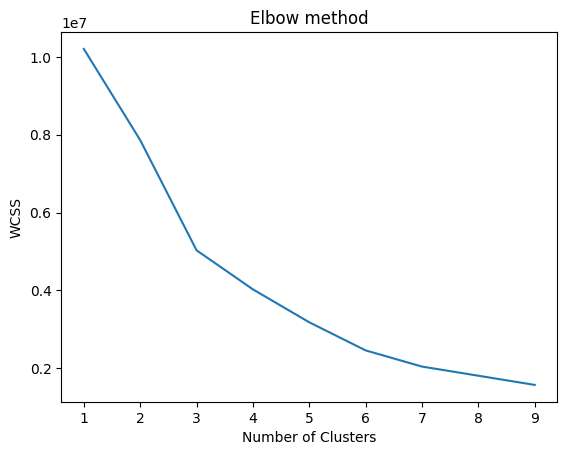

In [28]:
kmeans_models = [KMeans(n_clusters=k).fit(disease_data_cleaned.iloc[:, :-1]) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('cluster_elbow.png')
plt.show()

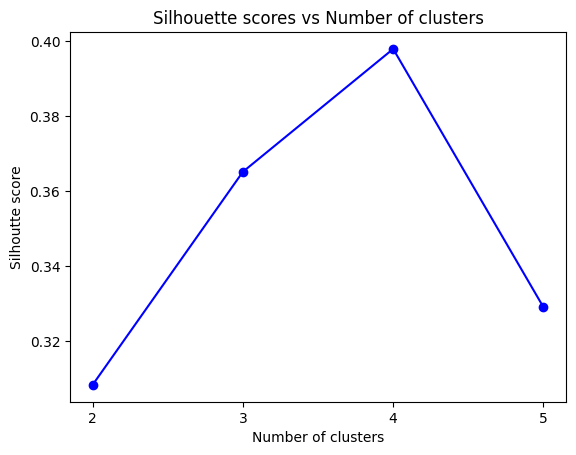

In [29]:
silhoutte_scores = [silhouette_score(disease_data_cleaned.iloc[:, :-1], model.labels_) for model in kmeans_models[1:5]]
plt.plot(range(2,6), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4, 5])
plt.title('Silhouette scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.savefig('cluster_plot.png')
plt.show()

In [30]:
kmeans = KMeans(n_clusters=3, random_state=20)
kmeans.fit(disease_data_cleaned.iloc[:, :-1])

print('Silhoutte score of our model is ' + str(silhouette_score(disease_data_cleaned.iloc[:, :-1], kmeans.labels_)))

Silhoutte score of our model is 0.36429972807248856


In [31]:
# add the cluster ids to the table
disease_data_cleaned['cluster_id'] = kmeans.labels_

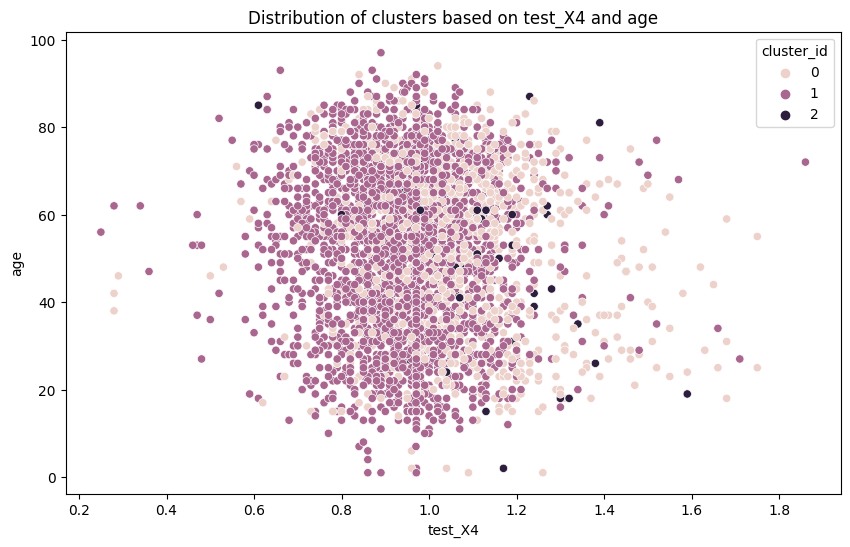

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=disease_data_cleaned, x='test_X4', y='age', hue='cluster_id')
plt.title('Distribution of clusters based on test_X4 and age')
plt.savefig('scatter_cluster.png')
plt.show()

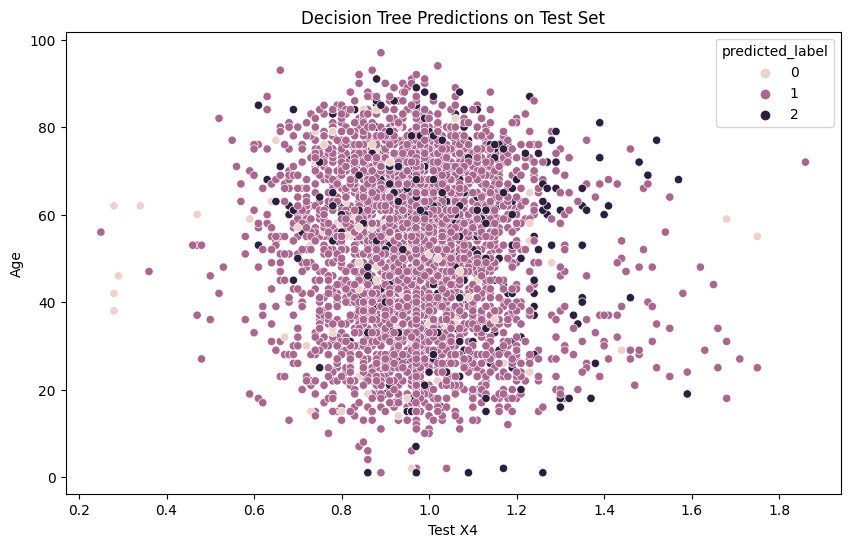

In [33]:
y_pred_test_dt = tuned_pipeline_dt.predict(disease_data_cleaned.iloc[:, :-2])

# Create a dataframe with the predicted labels
predicted_data_test = disease_data_cleaned.iloc[:, :-2].copy()
predicted_data_test['predicted_label'] = y_pred_test_dt

# Plot the scatter plot with predicted labels on the test set
plt.figure(figsize=(10, 6))
sns.scatterplot(data=predicted_data_test, x='test_X4', y='age', hue='predicted_label')
plt.title('Decision Tree Predictions on Test Set')
plt.xlabel('Test X4')
plt.ylabel('Age')
plt.savefig('scatter_dt.png')
plt.show()

# ALL DONE!!